# **Angular correlation between quark-antiquark pairs**

Read data from files and compute the angle between the quark and antiquark pair.

In [1]:
import numpy as np
import os
import pickle

current_path = os.getcwd() 
quark = 'beauty'

# pTs = [0.5, 5.0, 10.0]
# ntp = [10, 10, 10]
# events, nq = 10, 15

pTs = [0.5]

# data_tau = pickle.load(open(current_path + '/results/pb+pb_5020gev_su2_pT_0.5_wilson_lines_' + quark + '/ev_1_q_1_tp_1.pickle', "rb"))
data_tau = pickle.load(open(current_path + '/results/trial_fonll/ev_1_q_1_n_1.pickle', "rb"))
tau = np.array(data_tau['xmu'])[:, 0]
tau_s = 0.1
index_tau_s = min(range(len(tau)), key=lambda i: abs(tau[i]-tau_s))

p = pickle.load(open(current_path + '/results/trial_fonll/parameters.pickle', "rb"))
events = p['NEVENTS']

angles = {}
i = 0
for pT in pTs:
    # folder = 'pb+pb_5020gev_su2_pT_' + str(pT) + '_wilson_lines_' + quark
    folder = 'trial_fonll'
    directory = current_path + '/results/' + folder + '/'

    angles_pT = []

    for ev in range(1, events+1):
        # for tp in range(1, ntp[i]+1):
        #     for q in range(1, nq+1):
        pt, N = p['PTFONLL'], p['NFONLL']
        for ipt in range(len(pt)):
            for ip in range(N[ipt]):

                # Initially, quark and antiquark are produced in opposite directions, so the angle is 180 deg
                # file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.npz'
                # file_path_q = directory + file_name_q
                # data_q = np.load(file_path_q)
                # index_q = 0
                # pT_q = [data_q['pmu'][index_q, 1], data_q['pmu'][index_q, 2]]

                # file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.npz'
                # file_path_aq = directory + file_name_aq
                # data_aq = np.load(file_path_aq)
                # index_aq = 0
                # pT_aq = [data_aq['pmu'][index_aq, 1], data_aq['pmu'][index_aq, 2]]

                # file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.pickle'
                file_name_q = 'ev_' + str(ev) + '_q_' + str(ipt+1) + '_n_' + str(ip+1) + '.pickle'
                file_path_q = directory + file_name_q
                data_q = pickle.load(open(file_path_q, "rb"))
                # index_q = len(data_q['pmu'][:, 0]) - 1
                index_q = index_tau_s
                pT_q = [np.array(data_q['pmu'])[index_q, 1], np.array(data_q['pmu'])[index_q, 2]]

                # file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.pickle'
                file_name_aq = 'ev_' + str(ev) + '_aq_' + str(ipt+1) + '_n_' + str(ip+1) + '.pickle'
                file_path_aq = directory + file_name_aq
                data_aq = pickle.load(open(file_path_aq, "rb"))
                # index_aq = len(data_aq['pmu'][:, 0]) - 1
                index_aq = index_tau_s
                pT_aq = [np.array(data_aq['pmu'])[index_aq, 1], np.array(data_aq['pmu'])[index_aq, 2]]

                unit_vector_pT_q = pT_q / np.linalg.norm(pT_q)
                unit_vector_pT_aq = pT_aq / np.linalg.norm(pT_aq)
                dot_product = np.dot(unit_vector_pT_q, unit_vector_pT_aq)
                angle = np.arccos(dot_product) * 180 / np.pi
                # angle = np.arccos(dot_product)
                angles_pT.append(angle)

    angles[str(pT)] = angles_pT
    i=i+1

Plot the results.

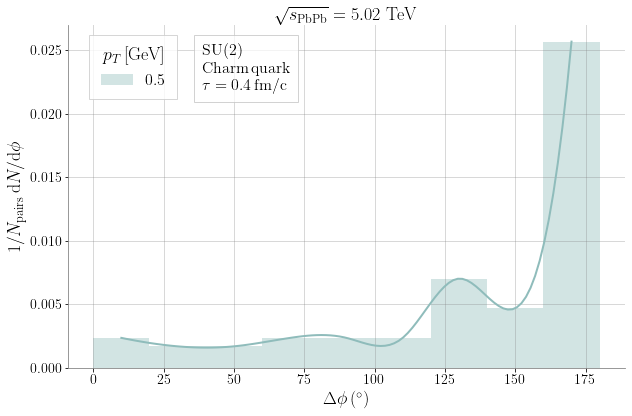

In [3]:
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams.update({'font.size':14})

fig = plt.figure()
ax = plt.subplot(111)
plt.title(r'$\sqrt{s_\mathrm{PbPb}}=5.02\,\,\mathrm{TeV}$', size = 18)
# plt.title(r'$\mathrm{Pb+Pb}\,\,\, 5.02\,\,\mathrm{TeV}\,\,\,\mathrm{SU(3)}\,\,\,\tau=0.4\,\mathrm{fm/c}$', size = 18)
plt.ylabel(r'$1/N_\mathrm{pairs}\,\mathrm{d}N/\mathrm{d}\phi$', size = 18)
plt.xlabel(r'$\Delta\phi\,(^\circ)$', size = 18)

# ax.yaxis.set_major_locator(MultipleLocator(0.02))
# ax.yaxis.set_minor_locator(MultipleLocator(0.01))
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray') 
# ax.tick_params(direction='in', colors='gray',grid_color='gray', grid_alpha=0.5)
plt.grid(color = 'gray', linestyle = '-', linewidth = 1, alpha=0.3)
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
plt.grid(b=True, which='minor', color='gray', alpha=0.1)

# nbins = [10, 20, 20]
nbins_interp = 100
phi_low, phi_high = 0, 180

# colors = ['#8FBCBB', '#A3BE8C', '#EBCB8B']
# pTs = [0.5, 5.0, 10.0]
# labels = [r'$0.5$', r'$5.0$', r'$10.0$']
nbins = [20]
pTs = [0.5]
colors = ['#8FBCBB']
labels = [r'$0.5$']
i=0

for pT in pTs:

    n, bins, _ = plt.hist(angles[str(pT)], bins=np.linspace(phi_low, phi_high, nbins[i]), density=True, alpha=0.4, color=colors[i], label=labels[i])  
    bin_centers = 0.5*(bins[1:]+bins[:-1])

    bin_interp = np.linspace(bin_centers[0], bin_centers[len(bin_centers)-1], nbins_interp)
    cubic_interp = interp1d(bin_centers, n, kind='cubic')
    cubic_results = cubic_interp(bin_interp)
    plt.plot(bin_interp, cubic_results, color=colors[i], linewidth = 2.0)
    i=i+1

leg = ax.legend(fontsize = 16, loc = 'upper left', bbox_to_anchor=(0.033,0.98))
leg.get_frame().set_boxstyle('square')
leg.set_title(r'$p_T\,\mathrm{[GeV]}$',prop={'size':18})

textstr = '\n'.join((
        r'${\huge\mathrm{SU(2)}}$',
        r'$\mathrm{Charm\,quark}$',
        # r'$\mathrm{Beauty\,quark}$',
        r'$\tau=0.4\,\mathrm{fm/c}$',
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.7, edgecolor='silver', pad=0.5)
ax.text(0.24, 0.948, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)

plt.tight_layout()
os.chdir(current_path)
# plt.savefig('plots/dNdphi_su2_pT_comp_pb+pb_5020gev_'+ quark + '.png', dpi = 300, facecolor='white', transparent=False)
plt.show()